In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer 
from sklearn import metrics
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import re
from bs4 import BeautifulSoup
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup


Using TensorFlow backend.


In [ ]:
# Reproducibility
np.random.seed(1234)

DEPRES_NROWS = 3200  # number of rows to read from DEPRESSIVE_TWEETS_CSV
RANDOM_NROWS = 12000 # number of rows to read from RANDOM_TWEETS_CSV
MAX_SEQUENCE_LENGTH = 140 # Max tweet size
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 300
TRAIN_SPLIT = 0.6
TEST_SPLIT = 0.2
LEARNING_RATE = 0.1
EPOCHS= 10
!pip install wordcloud
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\armug\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tweets = pd.read_csv('sentimeqnt_tweets3.csv')
tweets.head(20)

Unnamed: 0                                            message  label
0          106  just had a real good moment. i missssssssss hi...      0
1          217         is reading manga  http://plurk.com/p/mzp1e      0
2          220  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3          288  @lapcat Need to send 'em to my accountant tomo...      0
4          540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
5          624              so sleepy. good times tonight though       0
6          701  @SilkCharm re: #nbn as someone already said, d...      0
7          808                 23 or 24ï¿½C possible today. Nice       0
8         1193        nite twitterville  workout in the am  -ciao      0
9         1324    @daNanner Night, darlin'!  Sweet dreams to you       0
10        1332                           Good morning everybody!       0
11        1368  Finally! I just created my WordPress Blog. The...      0
12        1578  kisha they cnt get over u til they get out frm...      0
13        1595  @nicolerichie Yes i remember that band, It was...      0
14        1861             I really love reflections and shadows       0
15        1889  @blueaero ooo it's fantasy?  i like fantasy no...      0
16        1899  @rokchic28 no probs, I sell nothing other than...      0
17        1919  @shipovalov &quot;NOKLA connecting people&quot...      0
18        1992  Once again stayed up to late and have to start...      0
19        2097  @Kal_Penn I just read about your new job, CONG...      0

In [ ]:
tweets.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [ ]:
tweets['label'].value_counts()

0    8000
1    2314
Name: label, dtype: int64

# Splitting the Data in Training and Testing Sets
As you can see, I used almost all the data for training: 98% and the rest for testing.

In [ ]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(tweets.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = tweets.iloc[trainIndex]
testData = tweets.iloc[testIndex]

In [ ]:
trainData.head()

message  label
0  just had a real good moment. i missssssssss hi...      0
1         is reading manga  http://plurk.com/p/mzp1e      0
2  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3  @lapcat Need to send 'em to my accountant tomo...      0
4      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0

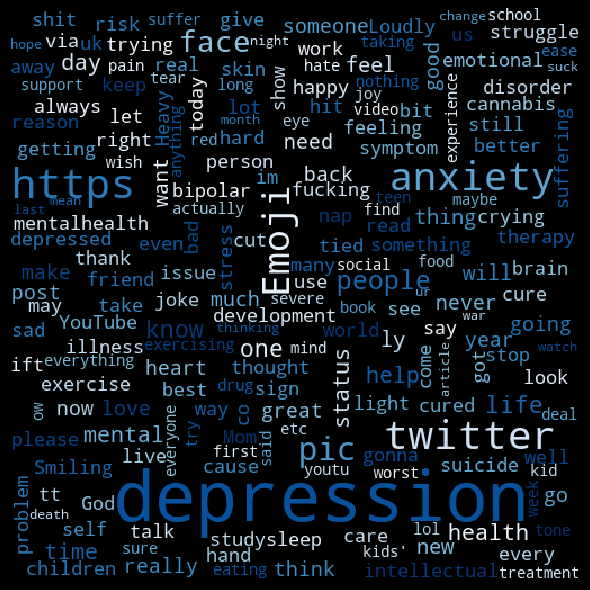

In [ ]:
depressive_words = ' '.join(list(tweets[tweets['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

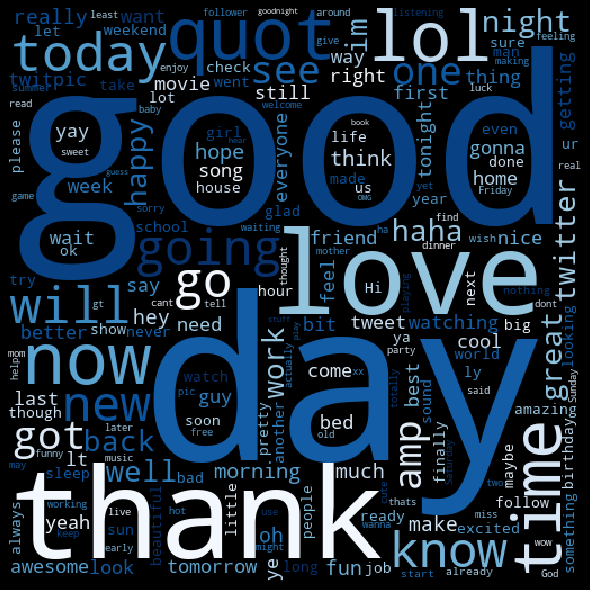

In [ ]:
positive_words = ' '.join(list(tweets[tweets['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
tweets.columns = ['Text', 'Sentiment']

In [ ]:
tweets['Depression'] = 'True'
tweets.loc[tweets['Sentiment'] ==0,'Depression'] = 'False'

In [ ]:
tweets

Text  Sentiment Depression
0      just had a real good moment. i missssssssss hi...          0      False
1             is reading manga  http://plurk.com/p/mzp1e          0      False
2      @comeagainjen http://twitpic.com/2y2lx - http:...          0      False
3      @lapcat Need to send 'em to my accountant tomo...          0      False
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder          0      False
5                  so sleepy. good times tonight though           0      False
6      @SilkCharm re: #nbn as someone already said, d...          0      False
7                     23 or 24ï¿½C possible today. Nice           0      False
8            nite twitterville  workout in the am  -ciao          0      False
9        @daNanner Night, darlin'!  Sweet dreams to you           0      False
10                              Good morning everybody!           0      False
11     Finally! I just created my WordPress Blog. The...          0      False
12     kisha they cnt get over u til they get out frm...          0      False
13     @nicolerichie Yes i remember that band, It was...          0      False
14                I really love reflections and shadows           0      False
15     @blueaero ooo it's fantasy?  i like fantasy no...          0      False
16     @rokchic28 no probs, I sell nothing other than...          0      False
17     @shipovalov &quot;NOKLA connecting people&quot...          0      False
18     Once again stayed up to late and have to start...          0      False
19     @Kal_Penn I just read about your new job, CONG...          0      False
20     haven't been able to sleep at ALL. i think i'l...          0      False
21     woo thanks ron and steeve for following me yeo...          0      False
22     @aidenchan yeah sure but its my sister's so ta...          0      False
23     @sian_the_mouse yay! a duck! if i want anythin...          0      False
24     smaaack that ass! hahhahahaa  i make myself la...          0      False
25     woo. its late! haha  goodnight twitterverse! xoxo          0      False
26     Looking forward to the meeting with Pastor Kon...          0      False
27     @doubleickey u know those minichocolates in th...          0      False
28        Testing to see if twitter works thro facebook           0      False
29     NIGHT babies. Got a VH1 thing in the am  Check...          0      False
...                                                  ...        ...        ...
10284  sometimes i don't fit in with my friends and i...          1       True
10285  #depression is to feel like crying every time ...          1       True
10286  girlllll its that type of depression that you ...          1       True
10287  My girl made it to season 4, dealing with her ...          1       True
10288  2 am suddenly having not good feels ok.bmp bec...          1       True
10289  #yoga 5 OLD AGE YOGA IN WEAKNESS STRESS & DEPR...          1       True
10290  #HealthNews - More than 1 in 20 US children an...          1       True
10291  From  https://ift.tt/2cx0PdNÂ  and more about ...          1       True
10292  @MikeStuchbery_  https://m.youtube.com/watch?f...          1       True
10293  #africa #tech It doesn't matter where you live...          1       True
10294  Fuck depression, it should honestly just kill ...          1       True
10295  I love Lauren so much <Emoji: Loudly crying fa...          1       True
10296                               fvck that depression          1       True
10297  suffering from chronic depression https://vine...          1       True
10298  And I guess, I just have to make sacrifices if...          1       True
10299  Engaging in physical activity decreases people...          1       True
10300         depression: i'm always here for u, darling          1       True
10301  I'm suffering from depression, I'm thankful th...          1       True
10302  More than one in 20 US children and teens have...          1       True
10303  IM GOING TO SEE 

In [ ]:
result_df = tweets.copy()

In [ ]:
result_df.dtypes

Text          object
Sentiment      int64
Depression    object
dtype: object

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
#STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text=str(text)
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
#    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [ ]:
result_df['Text'] = result_df['Text'].apply(clean_text)

In [ ]:
result_df=result_df.drop_duplicates()
result_df=result_df.dropna()

In [ ]:
df1=result_df.copy()

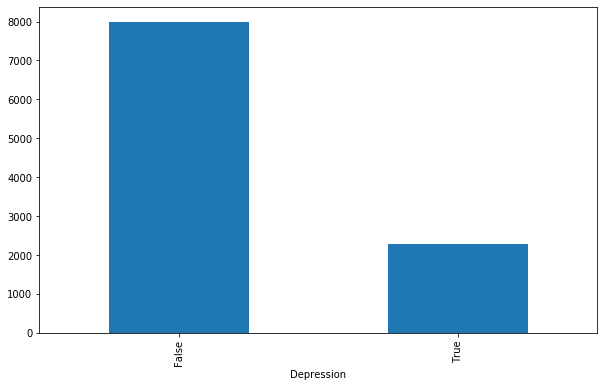

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
df1.groupby('Depression').Text.count().plot.bar(ylim=0)
plt.show()


In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 23601 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df1['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (10266, 250)


In [ ]:
Y = pd.get_dummies(df1['Depression']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (10266, 2)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9239, 250) (9239, 2)
(1027, 250) (1027, 2)


In [ ]:
import os

# LSTM and Word Embedding

In [ ]:
t = Tokenizer()
t.fit_on_texts(df1['Text'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(df1['Text'])
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[21, 80, 4, 201, 27, 674, 1, 6711, 189, 20, 84], [10, 497, 6712, 26, 540, 283, 6713], [3328, 26, 170, 6714, 26, 1370, 6715], [6716, 109, 2, 573, 851, 2, 8, 6717, 138, 6718, 1, 486, 150, 2037, 2, 8, 6719, 205, 28, 1641, 1277, 195], [425, 17, 15, 700, 6720, 6721], [20, 1278, 27, 324, 185, 195], [6722, 1049, 6723, 64, 172, 250, 274, 247, 6724, 2, 3, 130, 349, 54, 51, 37, 32, 314, 22, 1371, 41], [1182, 61, 6725, 1183, 62, 129], [701, 3329, 1279, 13, 3, 73, 6726], [6727, 85, 6728, 336, 852, 2, 6], [27, 105, 727], [237, 1, 21, 1372, 8, 2732, 350, 371, 250, 4, 350, 38, 15, 3, 1511, 404, 1814, 26, 474, 6729], [6730, 93, 2733, 39, 133, 58, 823, 93, 39, 33, 4348, 702, 58, 21, 405, 211, 15, 574], [3330, 166, 1, 405, 14, 659, 12, 30, 148, 51, 6, 162, 637], [1, 82, 36, 6731, 5, 2734], [6732, 2339, 24, 4349, 1, 35, 4349, 4350, 51, 216, 12, 33], [6733, 63, 2340, 1, 2735, 233, 231, 157, 8, 350, 26, 6734, 98, 19, 2, 39, 4, 415, 2, 23, 659, 15, 2038], [6735, 6736, 2736, 91], [265, 126, 2737, 38, 2, 444

In [ ]:
BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, '')


# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
with open('glove.6B.300d.txt', encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

Indexing word vectors.


In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
len(embedding_matrix)

23602

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=250, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(Y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.05,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)])


Train on 8777 samples, validate on 462 samples
Epoch 1/20
8777/8777 [==============================] - 59s 7ms/step - loss: 0.1279 - accuracy: 0.9565 - val_loss: 0.0134 - val_accuracy: 0.9978
Epoch 2/20
8777/8777 [==============================] - 63s 7ms/step - loss: 0.0252 - accuracy: 0.9953 - val_loss: 0.0128 - val_accuracy: 0.9978
Epoch 3/20
8777/8777 [==============================] - 65s 7ms/step - loss: 0.0249 - accuracy: 0.9949 - val_loss: 0.0141 - val_accuracy: 0.9978
Epoch 4/20
8777/8777 [==============================] - 66s 8ms/step - loss: 0.0231 - accuracy: 0.9954 - val_loss: 0.0137 - val_accuracy: 0.9978


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1027/1027 [==============================] - 2s 2ms/step
Test set
  Loss: 0.036
  Accuracy: 0.992


##### Saving Model

In [ ]:
from keras.models import load_model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


##### Loading Model

In [ ]:
model1 = load_model('model.h5')
# summarize model.
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 300)          7080600   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 7,241,202
Trainable params: 160,602
Non-trainable params: 7,080,600
_________________________________________________________________


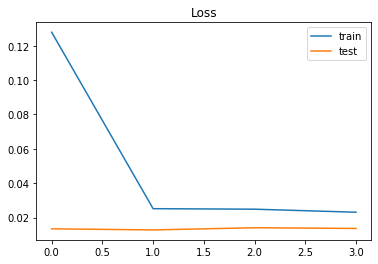

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

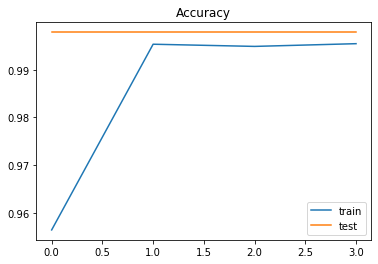

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
y_pred=model1.predict(X_test)
Y_test
list_pred=[]
for pred in y_pred:
    mval=0
    gval=0
    i=0
    for val in pred:
        if(val>gval):
            mval=i
            gval=val
        i+=1
    list_pred.append(mval)
new_list=[]
j=0
m_zero=np.zeros((2, 1027))
for i in list_pred:
    m_zero[i][j]=1
    j+=1

In [ ]:
len(y_pred)

1027

In [ ]:
def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

In [ ]:
preds=indices_to_one_hot(list_pred,2)

In [ ]:
preds=preds.astype(int)
Y1_test=Y_test.astype(int)

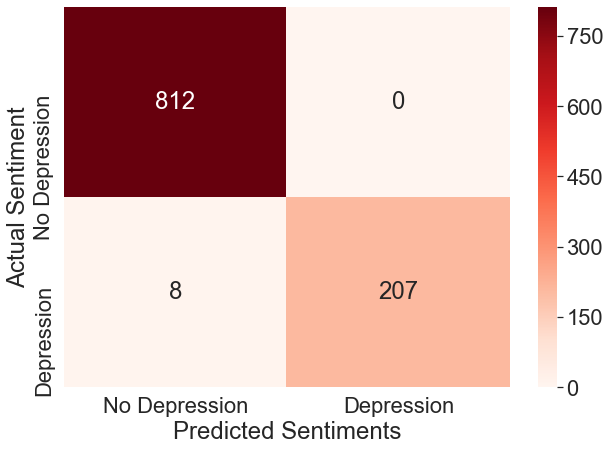

In [ ]:
#printing the Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = ['No Depression','Depression']
cm = confusion_matrix(Y1_test.argmax(axis=1), preds.argmax(axis=1))
#print(cm)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d',
            xticklabels=labels, yticklabels=labels,cmap='Reds')
sns.set(font_scale = 12)
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiments')
plt.show()

In [ ]:

# Finding Precision,recall,and f1-score for Naive Bayes

print('Metrics Classification Report : LSTM')
print(metrics.classification_report(Y1_test, preds))

Metrics Classification Report : LSTM
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       812
           1       1.00      0.96      0.98       215

   micro avg       0.99      0.99      0.99      1027
   macro avg       1.00      0.98      0.99      1027
weighted avg       0.99      0.99      0.99      1027
 samples avg       0.99      0.99      0.99      1027



In [ ]:
len(preds)

1027

# Predictions with TF-IDF and Bag of Words (BOW)

In [ ]:
## Test with a new sentence.

new_sentence = ['Loving how me and my lovely partner is talking about what we want']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
#print(pred[0].tolist())
labels = ['No Depression','Depression']
print(new_sentence, labels[np.argmax(pred)])

['Loving how me and my lovely partner is talking about what we want'] No Depression


In [ ]:
## Test with a new sentence.

new_sentence = ['Hi hello depression and anxiety are the worst']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
#print(pred[0].tolist())
labels = ['No Depression','Depression']
print(new_sentence, labels[np.argmax(pred)])

['Hi hello depression and anxiety are the worst'] Depression


In [ ]:
## Test with a new sentence.

new_sentence = ['Extreme sadness, lack of energy, hopelessness']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
#print(pred[0].tolist())
labels = ['No Depression','Depression']
print(new_sentence, labels[np.argmax(pred)])

['Extreme sadness, lack of energy, hopelessness'] Depression


In [ ]:
## Test with a new sentence.

new_sentence = ['My depression will not let me work out']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
#print(pred[0].tolist())
labels = ['No Depression','Depression']
print(new_sentence, labels[np.argmax(pred)])

['My depression will not let me work out'] Depression


In [ ]:
## Test with a new sentence.

new_sentence = ['Loving how me and my lovely partner is talking about what we want']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
#print(pred[0].tolist())
labels = ['No Depression','Depression']
print(new_sentence, labels[np.argmax(pred)])

['Loving how me and my lovely partner is talking about what we want'] No Depression


In [ ]:
## Test with a new sentence.

new_sentence = ['Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
#print(pred[0].tolist())
labels = ['No Depression','Depression']
print(new_sentence, labels[np.argmax(pred)])

['Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits'] No Depression


In [ ]:
## Test with a new sentence.

new_sentence = ['Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
#print(pred[0].tolist())
labels = ['No Depression','Depression']
print(new_sentence, labels[np.argmax(pred)])

['Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy'] No Depression


# Predictions with TF-IDF and Bag of Words (BOW)

In [ ]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [ ]:
class TweetClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.tweets, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.depressive_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 


    def calc_TF_and_IDF(self):
        noOfMessages = self.tweets.shape[0]
        self.depressive_tweets, self.positive_tweets = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.depressive_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.tweets.iloc[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.depressive_words += 1
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 
                    
    def classify(self, processed_message):
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                else:
                    pDepressive -= log(self.depressive_words + len(list(self.prob_depressive.keys())))
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        return pDepressive >= pPositive
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [ ]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [ ]:
sc_tf_idf = TweetClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.95
Recall:  0.38
F-score:  0.5428571428571428
Accuracy:  0.8375634517766497


In [ ]:
sc_bow = TweetClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  0.9285714285714286
Recall:  0.26
F-score:  0.40625
Accuracy:  0.8071065989847716


## Depressive Tweets
### TF-IDF

In [ ]:
pm = process_message('Lately I have been feeling unsure of myself as a person & an artist')
sc_tf_idf.classify(pm)

True

In [ ]:
pm = process_message('Extreme sadness, lack of energy, hopelessness')
sc_tf_idf.classify(pm)


True

### Bag of words

In [ ]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_bow.classify(pm)

True

In [ ]:
pm = process_message('My depression will not let me work out')
sc_bow.classify(pm)

True

## Positive Tweets
### TF-IDF

In [ ]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_tf_idf.classify(pm)


False

In [ ]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_tf_idf.classify(pm)


False

### Bag of words

In [ ]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_bow.classify(pm)

False

In [ ]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_bow.classify(pm)

False